# Microplásticos en el océano
## Análisis exploratorios de datos

### Búsqueda de correlación entre Halobates, Zooplankton, Microplásticos

Se analizó la correlación entre presencia de microplásticos, zooplankton y halobates de un dataset obtenido de [Datazoo](https://oceaninformatics.ucsd.edu/datazoo/catalogs/ccelter/datasets/213)

In [66]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
import csv
from scipy import stats
 
url = '/Users/beren/Documents/Clubes_de_Ciencia/Proyecto/zooplankton_halobates.csv'
names_zoo_halo = ["Halobates Abundance","Zooplankton Mass m2 (mg/mÂ²)","Microplastic Abundance" ,"Halobates Egg Abundance"]
df = pd.read_csv(url, names=names_zoo_halo)
df.head(5)

,Halobates Abundance,Zooplankton Mass m2 (mg/mÂ²),Microplastic Abundance,Halobates Egg Abundance
0,-9999.0,0.373,0.009,-9999.0
1,-9999.0,0.671,0.123,-9999.0
2,-9999.0,2.597,0.035,-9999.0
3,-9999.0,0.565,0.042,-9999.0
4,-9999.0,1.738,0.115,-9999.0


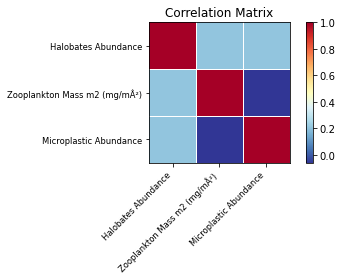

In [67]:
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

array([[<AxesSubplot:xlabel='Halobates Abundance', ylabel='Halobates Abundance'>,
        <AxesSubplot:xlabel='Zooplankton Mass m2 (mg/mÂ²)', ylabel='Halobates Abundance'>,
        <AxesSubplot:xlabel='Microplastic Abundance', ylabel='Halobates Abundance'>,
        <AxesSubplot:xlabel='Halobates Egg Abundance', ylabel='Halobates Abundance'>],
       [<AxesSubplot:xlabel='Halobates Abundance', ylabel='Zooplankton Mass m2 (mg/mÂ²)'>,
        <AxesSubplot:xlabel='Zooplankton Mass m2 (mg/mÂ²)', ylabel='Zooplankton Mass m2 (mg/mÂ²)'>,
        <AxesSubplot:xlabel='Microplastic Abundance', ylabel='Zooplankton Mass m2 (mg/mÂ²)'>,
        <AxesSubplot:xlabel='Halobates Egg Abundance', ylabel='Zooplankton Mass m2 (mg/mÂ²)'>],
       [<AxesSubplot:xlabel='Halobates Abundance', ylabel='Microplastic Abundance'>,
        <AxesSubplot:xlabel='Zooplankton Mass m2 (mg/mÂ²)', ylabel='Microplastic Abundance'>,
        <AxesSubplot:xlabel='Microplastic Abundance', ylabel='Microplastic Abundance'>,
       

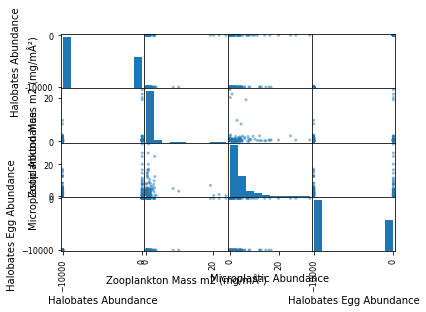

In [68]:
scatter_matrix(df[["Halobates Abundance","Zooplankton Mass m2 (mg/mÂ²)","Microplastic Abundance" ,"Halobates Egg Abundance"]])

In [69]:
df.corr()

,Halobates Abundance,Zooplankton Mass m2 (mg/mÂ²),Microplastic Abundance,Halobates Egg Abundance
Halobates Abundance,1.000000,0.212916,0.212692,1.000000
Zooplankton Mass m2 (mg/mÂ²),0.212916,1.000000,-0.060144,0.212921
Microplastic Abundance,0.212692,-0.060144,1.000000,0.212671
Halobates Egg Abundance,1.000000,0.212921,0.212671,1.000000


Se observa una correlación baja **0.212692** entre la abundancia de microplásticos y halobates, así como baja correlación entre zooplankton y presencia de halobates de **0.212916**, Por otro lado, hay una correlación negativa baja o inversa de **-0.060144** entre zooplankton y microplásticos.

### Búsqueda de intervalo de confianza entre abundancia de zooplankton y abundancia de microplásticos
Ya que se obtuvo una correlación de -0.060144 entre abundancia de microplásticos y abundancia de zooplankton, resulta interesante obtener el intervalo de confianza entre las variables mencionadas.

Primero se realiza la conversión de una lista a un array, aplanando los arrays de ambas variables al final.

In [70]:
url_microplastic = '/Users/beren/Documents/Clubes_de_Ciencia/Proyecto/microplastic.csv'
url_zoo = '/Users/beren/Documents/Clubes_de_Ciencia/Proyecto/zooplankton.csv'

results_m = []
results_z = []
with open(url_microplastic) as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
    for row in reader: # each row is a list
        results_m.append(row)
with open(url_zoo) as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
    for row in reader: # each row is a list
        results_z.append(row)

Se usa un algoritmo para obtener el intervalo de confianza:

In [71]:
m = np.array(results_m).flatten()
z = np.array(results_z).flatten()
# print(np.array(results_m), np.array(results_z))
def pearsonr_ci(x, y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

Obteniendo el siguiente resultado

In [72]:
pearsonr_ci(m, z,alpha=0.05)

(-0.06014399422900428,
 0.5158493143040077,
 -0.237567716924601,
 0.12116322451187513)

Siendo diferente de cero y por lo tanto el intervalo de confianza es significativo.

### Búsqueda de correlación entre longitudes y latitudes con presencia de microplásticos y microplásticos/zooplankton/halobates

Se busco una correlación no dependiente que correlaciones las longitudes y latitudes dónde hay presencia de microplásticos y halobates, la data pública se obtuvo de [Datazoo](https://oceaninformatics.ucsd.edu/datazoo/catalogs/ccelter/datasets/213) y [Microplásticos NOAA](https://www.ncei.noaa.gov/products/microplastics)

In [32]:
url_lotlat = '/Users/beren/Documents/Clubes_de_Ciencia/Proyecto/Microplastic_LotLat.csv' 
#names_lotlat = ["index","Latitude (Âº) Microplastic","Latitude (Âº) Halobates"]
names_lotlat = ["index","Latitude (Âº) Microplastic","Longitude (Âº) Microplastic","Latitude (Âº) Halobates" ,"Longitude (Âº) Halobates"]
dlotlat = pd.read_csv(url_lotlat, names=names_lotlat)
dlotlat.head(5)

,index,Latitude (Âº) Microplastic,Longitude (Âº) Microplastic,Latitude (Âº) Halobates,Longitude (Âº) Halobates
0,0.016,32.39980,-119.97725,1.266,-102.900
1,0.013,32.41992,-119.99162,2.900,-96.583
2,0.019,32.40838,-119.97648,4.083,-87.000
3,0.000,32.40768,-119.94468,1.466,-88.683
4,0.006,32.41248,-119.96887,1.450,-87.033


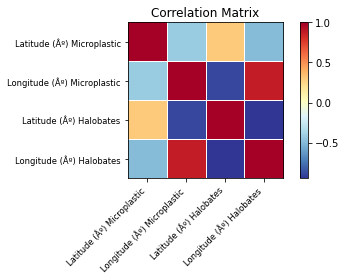

In [33]:
corr_lotlat = dlotlat.set_index('index').corr()
sm.graphics.plot_corr(corr_lotlat, xnames=list(corr_lotlat.columns))
plt.show()

Ahora se obtienen los datos exactos de la correlación:

### Valores de correlación entre latitudes/longitudes microplásticos y latitudes/longitudes Halobates

In [41]:
dlotlat.corr()

,index,Latitude (Âº) Microplastic,Longitude (Âº) Microplastic,Latitude (Âº) Halobates,Longitude (Âº) Halobates
index,1.000000,0.611227,-0.469817,0.407784,-0.523818
Latitude (Âº) Microplastic,0.611227,1.000000,-0.415273,0.302351,-0.486300
Longitude (Âº) Microplastic,-0.469817,-0.415273,1.000000,-0.881806,0.879943
Latitude (Âº) Halobates,0.407784,0.302351,-0.881806,1.000000,-0.941869
Longitude (Âº) Halobates,-0.523818,-0.486300,0.879943,-0.941869,1.000000


**NOTA: Para este análisis no utilizaremos la correlación entre Latitude (Âº) Microplastic y Longitude (Âº) Microplastic, Longitude (Âº) Halobates y  Latitude (Âº) Halobates,  Latitude (Âº) Microplastic y Longitude (Âº) Halobates, pues no esperamos que haya correlación entre estas variables.**

Las variables que esperamos tengan una correlación sin dependencia, son Latitude (Âº) Microplastic/Latitude (Âº) Halobates con **0.302351**, por otro lado, Longitude (Âº) Microplastic y Longitude (Âº) Halobates con **0.879943** con lo que se puede decir que se encuentran microsplásticos cerca de la misma longitud donde existe la presencia de Halobates.  